In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",50)
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv("C:/Users/Admin/Downloads/Projects/Predict Health Outcomes of Horses/train.csv")
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [143]:
id = df['id']

In [79]:
df.drop(['id'],axis=1,inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1235 non-null   object 
 7   peripheral_pulse       1235 non-null   object 
 8   mucous_membrane        1235 non-null   object 
 9   capillary_refill_time  1235 non-null   object 
 10  pain                   1235 non-null   object 
 11  peristalsis            1235 non-null   object 
 12  abdominal_distention   1235 non-null   object 
 13  nasogastric_tube       1235 non-null   object 
 14  nasogastric_reflux     1235 non-null   object 
 15  naso

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_number,1235.0,954500.401619,1.356403e+06,521399.0,528800.0,529777.0,534145.0,5305129.0
rectal_temp,1235.0,38.202186,7.886678e-01,35.4,37.8,38.2,38.6,40.8
pulse,1235.0,79.574089,2.910864e+01,30.0,53.0,76.0,100.0,184.0
respiratory_rate,1235.0,30.054251,1.645207e+01,8.0,18.0,28.0,36.0,96.0
nasogastric_reflux_ph,1235.0,4.382591,1.937357e+00,1.0,2.0,4.5,6.0,7.5
packed_cell_volume,1235.0,49.602429,1.053580e+01,23.0,43.0,48.0,57.0,75.0
total_protein,1235.0,21.388016,2.667645e+01,3.5,6.6,7.5,9.1,89.0
abdomo_protein,1235.0,3.290931,1.589195e+00,0.1,2.0,3.0,4.3,10.1
lesion_1,1235.0,3832.496356,5.436734e+03,0.0,2205.0,2209.0,3205.0,41110.0
lesion_2,1235.0,14.612146,1.937057e+02,0.0,0.0,0.0,0.0,3112.0


<AxesSubplot:>

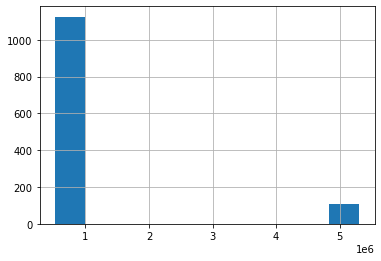

In [82]:
df['hospital_number'].hist()

In [83]:
df.groupby('outcome')['hospital_number'].size()

outcome
died          410
euthanized    251
lived         574
Name: hospital_number, dtype: int64

array([[<AxesSubplot:title={'center':'hospital_number'}>,
        <AxesSubplot:title={'center':'rectal_temp'}>,
        <AxesSubplot:title={'center':'pulse'}>],
       [<AxesSubplot:title={'center':'respiratory_rate'}>,
        <AxesSubplot:title={'center':'nasogastric_reflux_ph'}>,
        <AxesSubplot:title={'center':'packed_cell_volume'}>],
       [<AxesSubplot:title={'center':'total_protein'}>,
        <AxesSubplot:title={'center':'abdomo_protein'}>,
        <AxesSubplot:title={'center':'lesion_1'}>],
       [<AxesSubplot:title={'center':'lesion_2'}>,
        <AxesSubplot:title={'center':'lesion_3'}>, <AxesSubplot:>]],
      dtype=object)

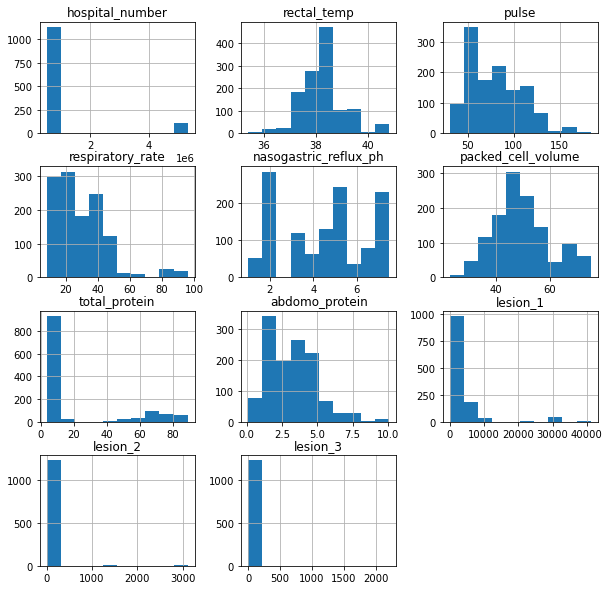

In [84]:
ax= plt.figure(figsize=(10,10))
df.hist(ax=ax)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'rectal_temp'),
  Text(2, 0, 'pulse'),
  Text(3, 0, 'respiratory_rate'),
  Text(4, 0, 'nasogastric_reflux_ph'),
  Text(5, 0, 'packed_cell_volume'),
  Text(6, 0, 'total_protein'),
  Text(7, 0, 'abdomo_protein'),
  Text(8, 0, 'lesion_1'),
  Text(9, 0, 'lesion_2'),
  Text(10, 0, 'lesion_3')])

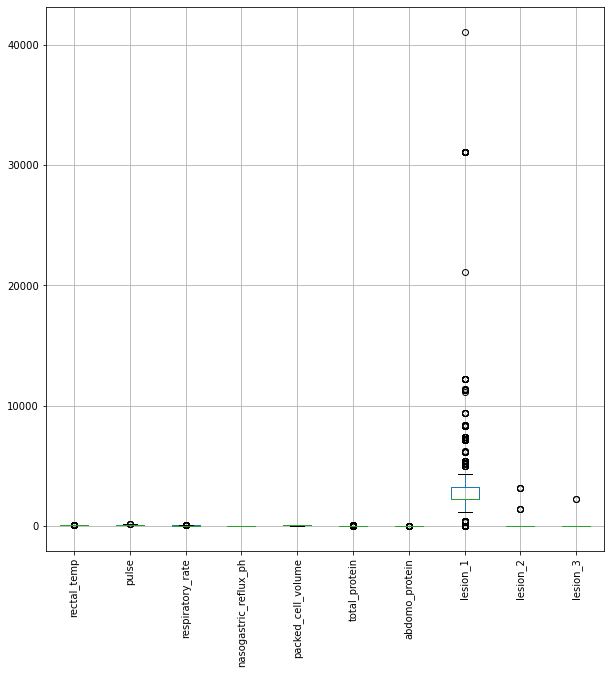

In [85]:
plt.figure(figsize=(10,10))
df.iloc[:,3:].boxplot();
plt.xticks(rotation=90)

In [86]:
cat_df = [x for x in df.columns if df[x].nunique()<10]
cat_df        

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'lesion_2',
 'lesion_3',
 'cp_data',
 'outcome']

In [87]:
df1 = df[cat_df]

In [88]:
df1['outcome'] = df1['outcome'].map({'died':0,'lived':2,'euthanized':1})

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
for i in df1.columns:
    df1[i] = le.fit_transform(df1[i])

In [91]:
df1.sample(10)

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,lesion_2,lesion_3,cp_data,outcome
448,1,0,2,1,5,2,2,1,4,3,2,1,2,2,1,0,0,1,1
561,0,0,2,4,5,3,4,1,1,0,2,2,3,3,1,0,0,1,1
1054,1,0,3,4,4,2,4,4,1,3,2,2,2,1,1,0,0,0,2
1111,0,0,3,3,2,3,2,5,2,0,2,2,3,0,0,0,0,1,1
795,1,0,4,4,4,2,0,4,2,1,1,2,1,3,1,0,0,1,2
990,1,0,3,3,2,3,4,4,2,3,3,2,0,2,1,0,0,1,2
321,1,0,2,4,6,3,2,4,1,2,1,2,4,3,1,0,0,0,0
851,0,0,2,4,6,2,2,1,4,1,3,2,2,3,0,0,0,1,0
978,0,0,2,3,4,2,2,5,4,1,3,4,0,1,0,0,0,1,2
6,1,0,2,4,4,2,5,5,4,1,2,2,0,2,0,0,0,1,1


In [92]:
num_df = [x for x in df.columns if df[x].nunique()>10]
num_df

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1']

In [93]:
df2 = df[num_df]

In [94]:
df2.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0


In [95]:
df3 = pd.concat([df1,df2],axis=1)

In [96]:
X = df3.drop('outcome',axis=1)
y = df3['outcome']

In [97]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier

In [101]:
lgt = LogisticRegression()
gnb = GaussianNB()
tree = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()
rf  = RandomForestClassifier()
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
abc = AdaBoostClassifier()

models = [lgt,gnb,tree,svm,knn,rf,gbc,bgc,abc]

In [102]:
models

[LogisticRegression(),
 GaussianNB(),
 DecisionTreeClassifier(),
 SVC(),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 BaggingClassifier(),
 AdaBoostClassifier()]

In [103]:
def model_fit_evaluate(model,X_train,y_train,X_test,y_test):
    print(model)
    print("**"*30)
    model.fit(X_train,y_train)
    print("training score",model.score(X_train,y_train))
    print("**"*30)
    print("testing score",model.score(X_test,y_test))
    print("**"*30)
    y_pred = model.predict(X_test)
    print("classification_report : ",classification_report(y_test,y_pred),end="\n\n")
    print("*-*"*30)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True)
    print("*-*"*30)


LogisticRegression()
************************************************************
training score 0.6619433198380567
************************************************************
testing score 0.659919028340081
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.56      0.69      0.62        72
           1       0.70      0.56      0.62        54
           2       0.72      0.69      0.70       121

    accuracy                           0.66       247
   macro avg       0.66      0.65      0.65       247
weighted avg       0.67      0.66      0.66       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


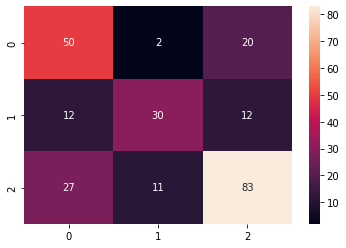

In [104]:
model_fit_evaluate(lgt,X_train_sc,y_train,X_test_sc,y_test)

GaussianNB()
************************************************************
training score 0.44534412955465585
************************************************************
testing score 0.4089068825910931
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.37      0.99      0.54        72
           1       0.57      0.54      0.55        54
           2       0.25      0.01      0.02       121

    accuracy                           0.41       247
   macro avg       0.40      0.51      0.37       247
weighted avg       0.35      0.41      0.29       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


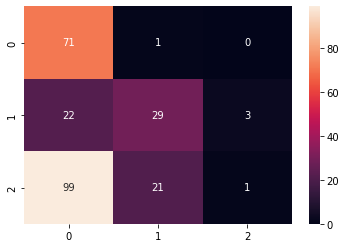

In [105]:
model_fit_evaluate(gnb,X_train_sc,y_train,X_test_sc,y_test)

KNeighborsClassifier()
************************************************************
training score 0.7459514170040485
************************************************************
testing score 0.659919028340081
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.55      0.75      0.63        72
           1       0.67      0.57      0.62        54
           2       0.76      0.64      0.70       121

    accuracy                           0.66       247
   macro avg       0.66      0.66      0.65       247
weighted avg       0.68      0.66      0.66       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


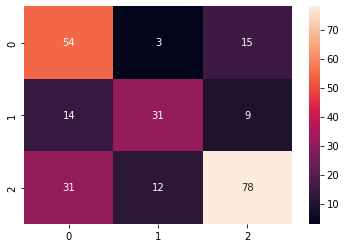

In [106]:
model_fit_evaluate(knn,X_train_sc,y_train,X_test_sc,y_test)

SVC()
************************************************************
training score 0.7894736842105263
************************************************************
testing score 0.6761133603238867
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.57      0.75      0.65        72
           1       0.68      0.50      0.57        54
           2       0.76      0.71      0.74       121

    accuracy                           0.68       247
   macro avg       0.67      0.65      0.65       247
weighted avg       0.69      0.68      0.68       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


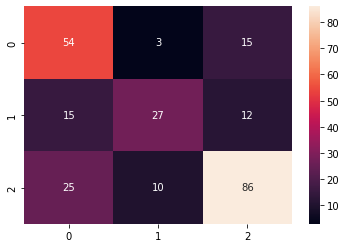

In [107]:
model_fit_evaluate(svm,X_train_sc,y_train,X_test_sc,y_test)

DecisionTreeClassifier()
************************************************************
training score 1.0
************************************************************
testing score 0.5506072874493927
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.40      0.50      0.44        72
           1       0.63      0.57      0.60        54
           2       0.64      0.57      0.60       121

    accuracy                           0.55       247
   macro avg       0.56      0.55      0.55       247
weighted avg       0.57      0.55      0.56       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


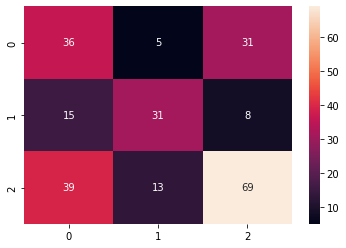

In [108]:
model_fit_evaluate(tree,X_train_sc,y_train,X_test_sc,y_test)

RandomForestClassifier()
************************************************************


training score 1.0
************************************************************
testing score 0.6963562753036437
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.58      0.74      0.65        72
           1       0.80      0.59      0.68        54
           2       0.76      0.72      0.74       121

    accuracy                           0.70       247
   macro avg       0.71      0.68      0.69       247
weighted avg       0.71      0.70      0.70       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


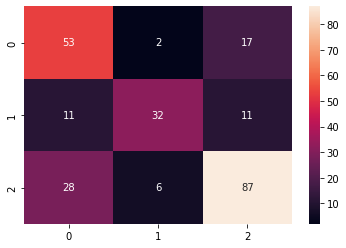

In [109]:
model_fit_evaluate(rf,X_train_sc,y_train,X_test_sc,y_test)

GradientBoostingClassifier()
************************************************************
training score 0.9018218623481782
************************************************************
testing score 0.7368421052631579
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.64      0.69      0.67        72
           1       0.84      0.67      0.74        54
           2       0.76      0.79      0.78       121

    accuracy                           0.74       247
   macro avg       0.75      0.72      0.73       247
weighted avg       0.74      0.74      0.74       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


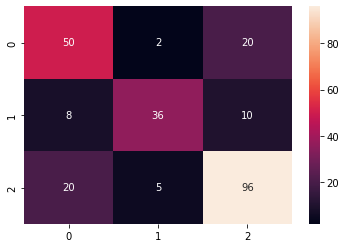

In [110]:
model_fit_evaluate(gbc,X_train_sc,y_train,X_test_sc,y_test)

BaggingClassifier()
************************************************************
training score 0.9858299595141701
************************************************************
testing score 0.6518218623481782
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.53      0.67      0.59        72
           1       0.71      0.59      0.65        54
           2       0.72      0.67      0.70       121

    accuracy                           0.65       247
   macro avg       0.66      0.64      0.64       247
weighted avg       0.67      0.65      0.65       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


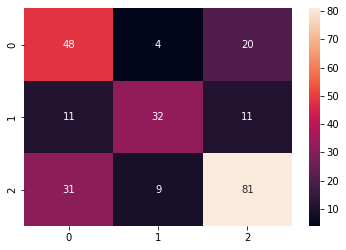

In [111]:
model_fit_evaluate(bgc,X_train_sc,y_train,X_test_sc,y_test)

AdaBoostClassifier()
************************************************************
training score 0.7074898785425101
************************************************************
testing score 0.6680161943319838
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.57      0.72      0.64        72
           1       0.67      0.54      0.60        54
           2       0.74      0.69      0.72       121

    accuracy                           0.67       247
   macro avg       0.66      0.65      0.65       247
weighted avg       0.68      0.67      0.67       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


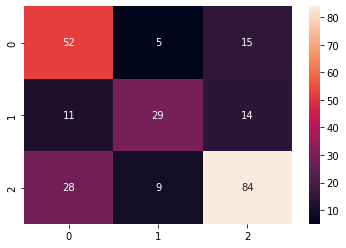

In [112]:
model_fit_evaluate(abc,X_train_sc,y_train,X_test_sc,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
************************************************************
training score 1.0
************************************************************
testing score 0.6963562753036437
************************************************************
classificatio

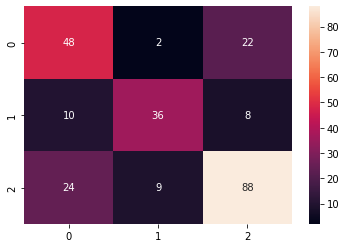

In [113]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_fit_evaluate(xgb,X_train_sc,y_train,X_test_sc,y_test)

In [114]:
from imblearn.over_sampling import RandomOverSampler
roc = RandomOverSampler()

In [115]:
X_train_ro,y_train_ro = roc.fit_resample(X_train_sc,y_train)

In [116]:
pd.DataFrame(X_train_ro).shape,y_train_ro.shape

((1359, 27), (1359,))

<AxesSubplot:>

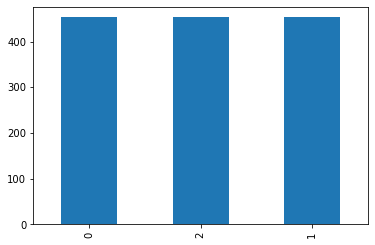

In [117]:
y_train_ro.value_counts().plot(kind='bar')

GradientBoostingClassifier()
************************************************************


training score 0.9028697571743929
************************************************************
testing score 0.7246963562753036
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.63      0.65      0.64        72
           1       0.71      0.74      0.73        54
           2       0.79      0.76      0.78       121

    accuracy                           0.72       247
   macro avg       0.71      0.72      0.71       247
weighted avg       0.73      0.72      0.73       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


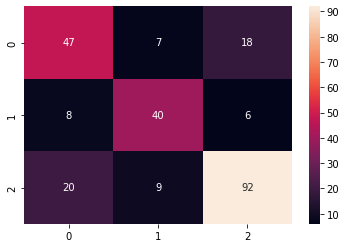

In [118]:
model_fit_evaluate(gbc,X_train_ro,y_train_ro,X_test_sc,y_test)

In [119]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm,y_train_sm = sm.fit_resample(X_train_sc,y_train)

GradientBoostingClassifier()
************************************************************
training score 0.9220014716703459
************************************************************
testing score 0.708502024291498
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.62      0.69      0.65        72
           1       0.69      0.67      0.68        54
           2       0.78      0.74      0.76       121

    accuracy                           0.71       247
   macro avg       0.70      0.70      0.70       247
weighted avg       0.71      0.71      0.71       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


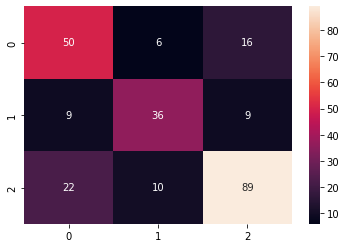

In [120]:
model_fit_evaluate(gbc,X_train_sm,y_train_sm,X_test_sc,y_test)

In [121]:
X = df3.drop('outcome',axis=1)
y = df3['outcome']

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   int32  
 1   age                    1235 non-null   int32  
 2   temp_of_extremities    1235 non-null   int32  
 3   peripheral_pulse       1235 non-null   int32  
 4   mucous_membrane        1235 non-null   int32  
 5   capillary_refill_time  1235 non-null   int32  
 6   pain                   1235 non-null   int32  
 7   peristalsis            1235 non-null   int32  
 8   abdominal_distention   1235 non-null   int32  
 9   nasogastric_tube       1235 non-null   int32  
 10  nasogastric_reflux     1235 non-null   int32  
 11  rectal_exam_feces      1235 non-null   int32  
 12  abdomen                1235 non-null   int32  
 13  abdomo_appearance      1235 non-null   int32  
 14  surgical_lesion        1235 non-null   int32  
 15  lesi

In [123]:
top_10 = X['hospital_number'].value_counts()
for i in top_10:
    X['hospital_number'] = np.where(X['hospital_number']==i,1,0)

In [124]:
X

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,lesion_2,lesion_3,cp_data,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1
0,1,0,2,4,3,3,2,1,4,3,1,2,2,3,1,0,0,0,0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209
1,1,0,2,3,5,3,4,1,1,1,2,1,2,3,1,0,0,0,0,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208
2,1,0,2,4,6,2,3,4,1,3,3,0,1,3,1,0,0,0,0,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124
3,1,0,1,4,6,3,4,4,1,3,2,2,2,2,1,0,0,1,0,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208
4,0,0,3,3,4,2,1,4,2,3,1,4,4,2,0,0,0,1,0,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,2,4,6,3,2,1,1,1,2,0,1,3,1,0,0,0,0,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206
1231,1,0,2,4,5,2,4,4,4,3,3,2,2,3,1,0,0,1,0,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209
1232,1,1,3,4,4,2,4,4,4,3,3,3,3,2,1,0,0,1,0,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400
1233,1,0,3,4,2,2,4,4,4,1,2,1,2,2,1,0,0,0,0,38.1,70.0,16.0,2.0,58.0,74.0,2.0,2209


In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

GradientBoostingClassifier()
************************************************************


training score 0.8846153846153846
************************************************************
testing score 0.7165991902834008
************************************************************
classification_report :                precision    recall  f1-score   support

           0       0.62      0.69      0.66        72
           1       0.79      0.61      0.69        54
           2       0.75      0.78      0.76       121

    accuracy                           0.72       247
   macro avg       0.72      0.69      0.70       247
weighted avg       0.72      0.72      0.72       247


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


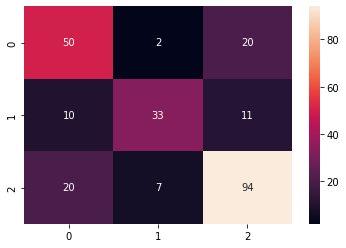

In [127]:
model_fit_evaluate(gbc,X_train,y_train,X_test,y_test)

In [128]:
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [129]:
best_gbc = grid_search.best_estimator_
print(best_gbc)
y_pred = best_gbc.predict(X_test)


GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=3,
                           min_samples_split=3, n_estimators=200)


In [130]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.7165991902834008
              precision    recall  f1-score   support

           0       0.63      0.65      0.64        72
           1       0.77      0.67      0.71        54
           2       0.75      0.78      0.76       121

    accuracy                           0.72       247
   macro avg       0.71      0.70      0.71       247
weighted avg       0.72      0.72      0.72       247



In [151]:
test = pd.read_csv("test.csv")
test.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,none,none,7.0,normal,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,moderate,slight,none,3.5,decreased,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,normal,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,depressed,absent,severe,slight,more_1_liter,2.0,absent,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,less_3_sec,mild_pain,absent,slight,slight,none,3.0,decreased,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [152]:
id = test['id']

In [132]:
test.drop('id',axis=1,inplace=True)

In [133]:
test_cat = [x for x in test.columns if test[x].nunique()<10]
test_1 = test[test_cat]
for i in test_1.columns:
    test_1[i] = le.fit_transform(test_1[i])
num_test = [x for x in test.columns if test[x].nunique()>10]
test_2 = test[num_test]
final_test = pd.concat([test_1,test_2],axis=1)
final_test.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,lesion_2,lesion_3,cp_data,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1
0,0,0,3,3,4,2,4,3,4,1,3,4,2,1,0,0,0,0,534053,38.6,40.0,20.0,7.0,42.0,7.5,2.3,0
1,1,0,2,4,1,3,2,3,1,3,3,2,2,3,0,0,0,1,528469,38.2,112.0,48.0,3.5,44.0,6.0,2.6,2208
2,1,0,2,3,2,2,4,3,4,3,3,4,2,2,1,0,0,1,528178,37.7,66.0,12.0,3.0,31.5,6.0,1.6,2205
3,0,0,2,4,5,2,2,1,3,3,2,1,1,0,1,0,0,0,534784,37.1,88.0,20.0,2.0,75.0,81.0,1.0,1400
4,1,0,0,3,1,2,4,1,4,3,3,2,2,2,1,0,0,1,529840,38.3,50.0,12.0,3.0,37.0,6.8,2.6,2208


In [134]:
final_1 = scaler.transform(final_test)
final_1

array([[-1.58225981, -0.2609753 ,  1.04021098, ..., -0.52395319,
        -0.62535283, -0.71095822],
       [ 0.63200746, -0.2609753 , -0.25090516, ..., -0.58009469,
        -0.43709914, -0.30790329],
       [ 0.63200746, -0.2609753 , -0.25090516, ..., -0.58009469,
        -1.06461142, -0.30845092],
       ...,
       [ 0.63200746, -0.2609753 , -0.25090516, ..., -0.52021043,
         0.75517419, -0.30845092],
       [-1.58225981, -0.2609753 ,  1.04021098, ..., -0.48278276,
         1.06893033, -0.14306696],
       [ 0.63200746, -0.2609753 , -1.5420213 , ..., -0.57260916,
        -1.06461142, -0.30845092]])

In [139]:
final_predict = best_gbc.predict(final_1)

In [161]:
values = pd.DataFrame(final_predict)

In [163]:
submission = pd.DataFrame({
    "id": id,
    "outcome":values[0].map({0:'died',1:'euthanized',2:'lived'})
})

In [165]:
submission.to_csv('submission.csv',index=False)